# WeatherPy
----


In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from pprint import pprint
from itertools import combinations
from datetime import datetime

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

610

### Perform API Calls

In [3]:
# Save config information
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

query_url = f"{url}appid={weather_api_key}&units={units}&q="


In [4]:
# set up lists to hold reponse info
lat = []
lon=[]
temp = []
humidity = []
clouds = []
wind_speed = []
country = []
date = []
city_list = []

#count records and set numbers
record_num = 0
set_num = 1

In [5]:
print('''
Beginning Data Retrieval     
-----------------------------
''')   

# Loop through the list of cities and perform a request for data on each
for city in cities:
    try: 
        response = requests.get(query_url + city).json()
        lat.append(response['coord']['lat'])
        lon.append(response['coord']['lon'])
        temp.append(response['main']['temp_max'])
        humidity.append(response['main']['humidity'])
        clouds.append(response['clouds']['all'])
        wind_speed.append(response['wind']['speed'])
        country.append(response['sys']['country'])
        date.append(response['dt'])
        
        if record_num ==50:
            set_num += 1
            record_num = 1 
            city_list.append(city)
        
        else:
            record_num += 1 
            city_list.append(city)
        print(f"Processing Record {record_num} of Set {set_num} | {city} ")
    
    except (KeyError,IndexError):
        print ("City not found. Skipping...")
        
print('''
Data Retrieval Complete    
-----------------------------
''')  
    


Beginning Data Retrieval     
-----------------------------

City not found. Skipping...
Processing Record 1 of Set 1 | mataura 
Processing Record 2 of Set 1 | castro 
Processing Record 3 of Set 1 | klaksvik 
City not found. Skipping...
Processing Record 4 of Set 1 | ribeira grande 
Processing Record 5 of Set 1 | cidreira 
Processing Record 6 of Set 1 | nanakuli 
Processing Record 7 of Set 1 | kapaa 
Processing Record 8 of Set 1 | butaritari 
Processing Record 9 of Set 1 | marica 
Processing Record 10 of Set 1 | lebu 
City not found. Skipping...
Processing Record 11 of Set 1 | nushki 
Processing Record 12 of Set 1 | sosnogorsk 
Processing Record 13 of Set 1 | rikitea 
Processing Record 14 of Set 1 | mabaruma 
Processing Record 15 of Set 1 | bilma 
City not found. Skipping...
Processing Record 16 of Set 1 | ust-ilimsk 
Processing Record 17 of Set 1 | kodiak 
Processing Record 18 of Set 1 | longyearbyen 
Processing Record 19 of Set 1 | rio gallegos 
Processing Record 20 of Set 1 | tasii

Processing Record 31 of Set 4 | lompoc 
City not found. Skipping...
Processing Record 32 of Set 4 | awjilah 
City not found. Skipping...
Processing Record 33 of Set 4 | amalapuram 
Processing Record 34 of Set 4 | arraial do cabo 
Processing Record 35 of Set 4 | asfi 
City not found. Skipping...
Processing Record 36 of Set 4 | faanui 
Processing Record 37 of Set 4 | omboue 
Processing Record 38 of Set 4 | fort frances 
Processing Record 39 of Set 4 | saint-philippe 
City not found. Skipping...
Processing Record 40 of Set 4 | bonfim 
Processing Record 41 of Set 4 | jijiga 
Processing Record 42 of Set 4 | toamasina 
Processing Record 43 of Set 4 | saldanha 
Processing Record 44 of Set 4 | moose factory 
Processing Record 45 of Set 4 | progreso 
City not found. Skipping...
Processing Record 46 of Set 4 | elizabeth city 
Processing Record 47 of Set 4 | angoram 
Processing Record 48 of Set 4 | ahipara 
Processing Record 49 of Set 4 | provideniya 
Processing Record 50 of Set 4 | samarai 
City

Processing Record 14 of Set 8 | malumfashi 
Processing Record 15 of Set 8 | coihaique 
Processing Record 16 of Set 8 | pahrump 
Processing Record 17 of Set 8 | lundazi 
Processing Record 18 of Set 8 | sakakah 
Processing Record 19 of Set 8 | codrington 
Processing Record 20 of Set 8 | paengaroa 
Processing Record 21 of Set 8 | oussouye 
Processing Record 22 of Set 8 | paita 
City not found. Skipping...
Processing Record 23 of Set 8 | alyangula 
Processing Record 24 of Set 8 | leshukonskoye 
Processing Record 25 of Set 8 | champerico 
Processing Record 26 of Set 8 | binga 
Processing Record 27 of Set 8 | aden 
Processing Record 28 of Set 8 | altay 
City not found. Skipping...
Processing Record 29 of Set 8 | klyuchi 
Processing Record 30 of Set 8 | aykhal 
Processing Record 31 of Set 8 | kloulklubed 
Processing Record 32 of Set 8 | sao joao da barra 
Processing Record 33 of Set 8 | acari 
Processing Record 34 of Set 8 | yeniseysk 
Processing Record 35 of Set 8 | fort-shevchenko 
City not

Processing Record 47 of Set 11 | qeshm 
Processing Record 48 of Set 11 | horasan 
Processing Record 49 of Set 11 | tautira 
City not found. Skipping...
Processing Record 50 of Set 11 | bela 
Processing Record 1 of Set 12 | kunri 
Processing Record 2 of Set 12 | richards bay 
Processing Record 3 of Set 12 | cotonou 
Processing Record 4 of Set 12 | luoyang 
Processing Record 5 of Set 12 | fukue 
City not found. Skipping...

Data Retrieval Complete    
-----------------------------



### Convert Raw Data to DataFrame


In [6]:
#create dictionary to dreate data frame
city_dict = {
    "City": city_list,
    "Lat": lat, 
    "Lng": lon, 
    "Max Temp": temp, 
    "Humidity": humidity,
    "Cloudiness": clouds, 
    "Wind Speed": wind_speed, 
    "Country": country, 
    "Date": date }
    
#create data frame
city_dict= pd.DataFrame(city_dict)

In [7]:
#export the city data into a .csv.
city_dict.to_csv("cities.csv", index=False)

In [8]:
#print dataframe
weather_df= pd.DataFrame(city_dict)
weather_df

City      Lat       Lng  Max Temp  Humidity  Cloudiness  \
0           mataura -46.1927  168.8643     42.48        94          82   
1            castro -24.7911  -50.0119     53.83        93          62   
2          klaksvik  62.2266   -6.5890     54.52        99         100   
3    ribeira grande  38.5167  -28.7000     63.00        82          40   
4          cidreira -30.1811  -50.2056     61.86        87          99   
..              ...      ...       ...       ...       ...         ...   
550           kunri  25.1785   69.5691     96.82        44         100   
551    richards bay -28.7830   32.0377     63.28        84         100   
552         cotonou   6.3654    2.4183     78.78        89          40   
553         luoyang  34.6836  112.4536     83.23        44           6   
554           fukue  32.6881  128.8419     82.76        89          75   

     Wind Speed Country        Date  
0          9.91      NZ  1631001265  
1          8.12      BR  1631001266  
2         13.49      FO  1631001266  
3          5.75      PT  1631001267  
4         23.00      BR  1631001267  
..          ...     ...         ...  
550        6.82      PK  1631001500  
551       11.77      ZA  1631001500  
552       10.36      BJ  1631001501  
553        3.06      CN  1631001501  
554       10.36      JP  1631001502  

[555 rows x 9 columns]

## Plotting the Data


## Latitude vs. Temperature Plot

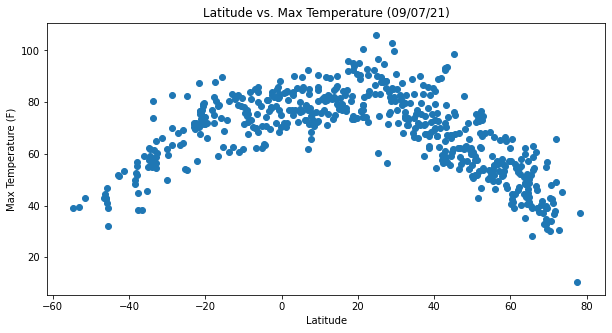

In [41]:
latitude = weather_df['Lat']
temperature = weather_df['Max Temp']

plt.figure(figsize=[10,5])

# Plot the lat vs the max temp
plt.scatter(x = latitude, y = temperature)

# Add labeling
# This extracts the date and returns it in the local time zone
# lat_time_plt = datetime.fromtimestamp(city_dict.loc[0,"Date"]).strftime('%Y-%m-%d')
plt.title(f"Latitude vs. Max Temperature ({time.strftime('%x')})")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")

# Modify ticks
# plt.xlim(-80,100)
# plt.ylim(min(temperature) - 10 , max(temperature) +10)
plt.savefig('Images/Latitude_vs_Temperature_Plot.png', bbox_inches='tight')

This code is analizing how hot the temperature gets along all latitudes of the selected cities. We can see that the hottest temperatures happen between -20 and 40 latitude which would include the contries of Africa and Europe. 

## Latitude vs. Humidity Plot

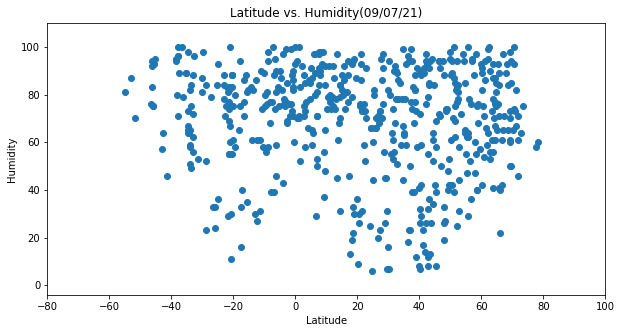

In [42]:

plt.figure(figsize=(10,5));

# Plot the lat vs humidity
plt.scatter(x = weather_df['Lat'], y = weather_df['Humidity']);

# Add labeling
# This extracts the date and returns it in the local time zone
plt.title(f"Latitude vs. Humidity({time.strftime('%x')})");
plt.xlabel("Latitude");
plt.ylabel("Humidity");

# Modify ticks
plt.xlim(-80,100);
plt.ylim(min(humidity) - 10 , max(humidity) +10);
plt.savefig('Images/Latitude_vs_Humidity_Plot.png', bbox_inches='tight')

This code is analizing how humid gets along all latitudes of the selected cities. We do not see a real relationship represented here. 

## Latitude vs. Cloudiness Plot

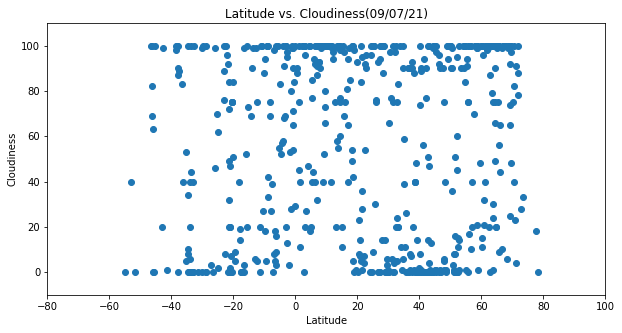

In [43]:
plt.figure(figsize=(10,5));

# Plot the lat vs Cloudiness
plt.scatter(x = weather_df['Lat'], y = weather_df['Cloudiness']);

# Add labeling
# This extracts the date and returns it in the local time zone

plt.title(f"Latitude vs. Cloudiness({time.strftime('%x')})");
plt.xlabel("Latitude");
plt.ylabel("Cloudiness");

# Modify ticks
plt.xlim(-80,100);
plt.ylim(min(clouds) - 10 , max(clouds) +10);
plt.savefig('Images/Latitude_vs_Cloudiness_Plot.png', bbox_inches='tight')

This code is analizing how cloudy it gets along all latitudes of the selected cities. We do not see a real relationship represented here. 

## Latitude vs. Wind Speed Plot

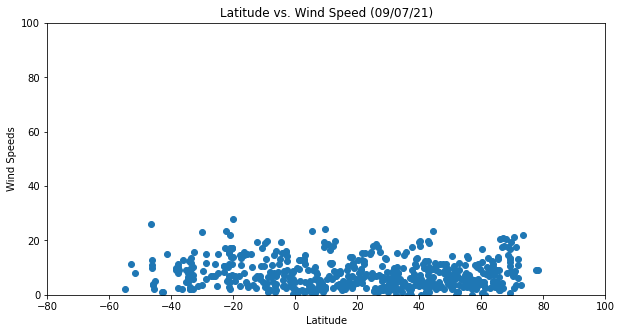

In [44]:
plt.figure(figsize=(10,5));

# Plot the lat vs Wind
plt.scatter(x = weather_df['Lat'], y = weather_df['Wind Speed']);

# Add labeling
plt.title(f"Latitude vs. Wind Speed ({time.strftime('%x')})");
plt.xlabel("Latitude");
plt.ylabel("Wind Speeds");

# Modify ticks
plt.xlim(-80,100);
plt.ylim(min(clouds) , max(clouds) );
plt.savefig('Images/Latitude_vs_Wind_Speed_Plot.png', bbox_inches='tight')

This code is analizing how windy it gets along all latitudes of the selected cities. We see that wind speeds tend to stay under 40mph along all latitudes. 

## Linear Regression

In [13]:
northern = weather_df[weather_df['Lat']>=0]
southern = weather_df[weather_df['Lat']<0]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.6024776506267218


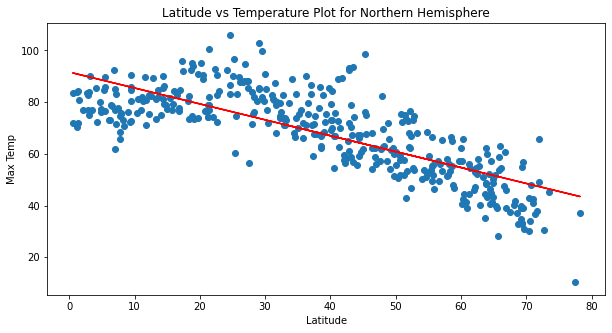

In [45]:
(slope, intercept, rvalue, pvalue, stderr) = linregress(northern['Lat'], northern['Max Temp'])
regress_values = northern['Lat']*slope + intercept

plt.figure(figsize=(10,5));

plt.scatter(northern['Lat'], northern['Max Temp'], )
plt.title("Latitude vs Temperature Plot for Northern Hemisphere"), 
plt.xlabel("Latitude"), 
plt.ylabel("Max Temp");
plt.plot(northern['Lat'], regress_values, 'r-');
print(f"The r-squared is: {rvalue**2}")
plt.savefig('Images/NH_MaxTemp_vs_Latitude_Linear_Regression.png', bbox_inches='tight')

 This plot is analyzing the relationship between a city's temperature and latitude where the city is within the Norther Hemisphere. Here we see temperatures are lower in cities where the latitude is higher. This information implies that the further away from the equator a city is, the colder it will be. Our r value confirms this.

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.6103265784558866


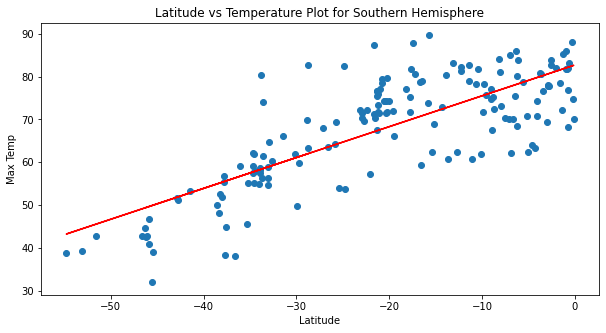

In [46]:
(slope, intercept, rvalue, pvalue, stderr) = linregress(southern['Lat'], southern['Max Temp'])
regress_values = southern['Lat']*slope + intercept

plt.figure(figsize=(10,5));

plt.scatter(southern['Lat'], southern['Max Temp'], )
plt.title("Latitude vs Temperature Plot for Southern Hemisphere"), 
plt.xlabel("Latitude"), 
plt.ylabel("Max Temp");
plt.plot(southern['Lat'], regress_values, 'r-');
print(f"The r-squared is: {rvalue**2}")
plt.savefig('Images/SH_MaxTemp_vs_Latitude_Linear_Regression.png', bbox_inches='tight')

This plot is analyzing the relationship between a city's temperature and latitude where the city is within the Southern Hemisphere. Here we see temperatures are higher in cities where the latitude is lower. This information implies that the closer from the equator a city is, the warmer it will be. Our r value confirms this.

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.002346644959105904


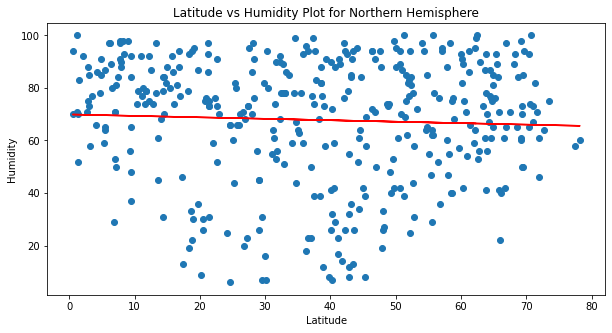

In [47]:
(slope, intercept, rvalue, pvalue, stderr) = linregress(northern['Lat'], northern['Humidity'])
regress_values = northern['Lat']*slope + intercept

plt.figure(figsize=(10,5));

plt.scatter(northern['Lat'], northern['Humidity'], )
plt.title("Latitude vs Humidity Plot for Northern Hemisphere"), 
plt.xlabel("Latitude"), 
plt.ylabel("Humidity");
plt.plot(northern['Lat'], regress_values, 'r-');
print(f"The r-squared is: {rvalue**2}")
plt.savefig('Images/NH_Humidity_vs_Latitude_Linear_Regression.png', bbox_inches='tight')

This plot is analyzing the relationship between a city's humidity and latitude where the city is within the Northern Hemisphere. Here, we do not see a relationtion between humidity and latitude. Our r value confirms this. 

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.00027158651180702556


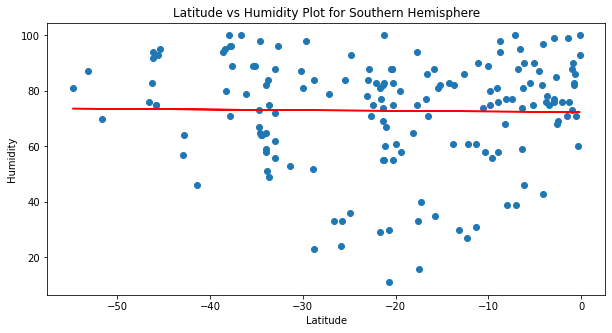

In [48]:
(slope, intercept, rvalue, pvalue, stderr) = linregress(southern['Lat'], southern['Humidity'])
regress_values = southern['Lat']*slope + intercept

plt.figure(figsize=(10,5));

plt.scatter(southern['Lat'], southern['Humidity'], )
plt.title("Latitude vs Humidity Plot for Southern Hemisphere"), 
plt.xlabel("Latitude"), 
plt.ylabel("Humidity");
plt.plot(southern['Lat'], regress_values, 'r-');
print(f"The r-squared is: {rvalue**2}")
plt.savefig('Images/SH_Humidity_vs_Latitude_Linear_Regression.png', bbox_inches='tight')

This plot is analyzing the relationship between a city's humidity and latitude where the city is within the Southern Hemisphere. Here, we do not see a relationtion between humidity and latitude. Our r value confirms this.

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.003030912991516805


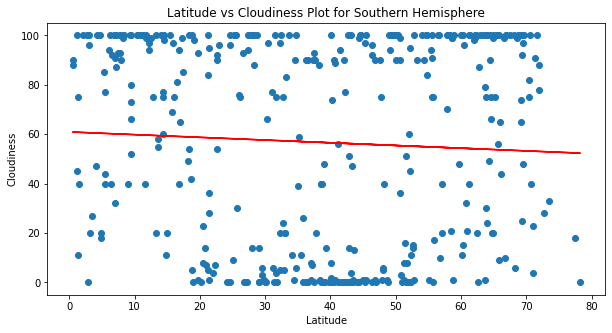

In [49]:
(slope, intercept, rvalue, pvalue, stderr) = linregress(northern['Lat'], northern['Cloudiness'])
regress_values = northern['Lat']*slope + intercept

plt.figure(figsize=(10,5));

plt.scatter(northern['Lat'], northern['Cloudiness'], )
plt.title("Latitude vs Cloudiness Plot for Southern Hemisphere"), 
plt.xlabel("Latitude"), 
plt.ylabel("Cloudiness");
plt.plot(northern['Lat'], regress_values, 'r-');
print(f"The r-squared is: {rvalue**2}")
plt.savefig('Images/NH_Cloudiness_vs_Latitude_Linear_Regression.png', bbox_inches='tight')

This plot is analyzing the relationship between a city's cloudiness and latitude where the city is within the Northern Hemisphere. Here, we do not see a relationtion between cloudiness and latitude. Our r value confirms this.

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.02214820005996666


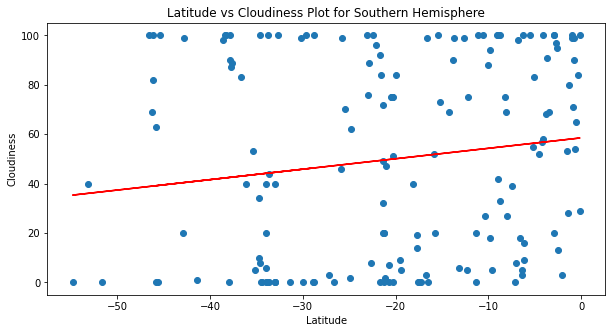

In [50]:
(slope, intercept, rvalue, pvalue, stderr) = linregress(southern['Lat'], southern['Cloudiness'])
regress_values = southern['Lat']*slope + intercept

plt.figure(figsize=(10,5));

plt.scatter(southern['Lat'], southern['Cloudiness'], )
plt.title("Latitude vs Cloudiness Plot for Southern Hemisphere"), 
plt.xlabel("Latitude"), 
plt.ylabel("Cloudiness");
plt.plot(southern['Lat'], regress_values, 'r-');
print(f"The r-squared is: {rvalue**2}")
plt.savefig('Images/SH_Cloudiness_vs_Latitude_Linear_Regression.png', bbox_inches='tight')

This plot is analyzing the relationship between a city's cloudiness and latitude where the city is within the Southern Hemisphere. Here, we do not see a relationtion between cloudiness and latitude. Our r value confirms this.

We do, however, notice that the Northern Hemisphere is cloudier than the Southern Hemisphere. 

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.007449093831220206


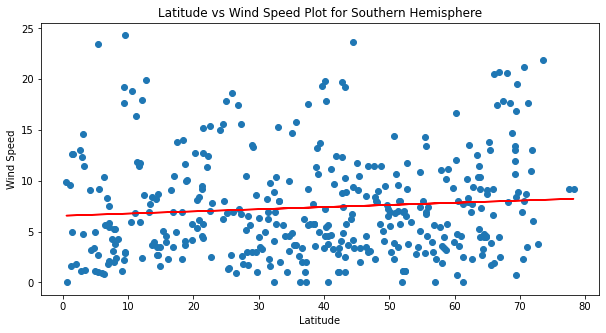

In [51]:
(slope, intercept, rvalue, pvalue, stderr) = linregress(northern['Lat'], northern['Wind Speed'])
regress_values = northern['Lat']*slope + intercept

plt.figure(figsize=(10,5));

plt.scatter(northern['Lat'], northern['Wind Speed'], )
plt.title("Latitude vs Wind Speed Plot for Southern Hemisphere"), 
plt.xlabel("Latitude"), 
plt.ylabel("Wind Speed");
plt.plot(northern['Lat'], regress_values, 'r-');
print(f"The r-squared is: {rvalue**2}")
plt.savefig('Images/NH_Windspeed_vs_Latitude_Linear_Regression.png', bbox_inches='tight')

This plot is analyzing the relationship between a city's windspeed and latitude where the city is within the Northern Hemisphere. Here, we do not see a relationtion between cloudiness and latitude. Our r value confirms this.

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.0012020378928875978


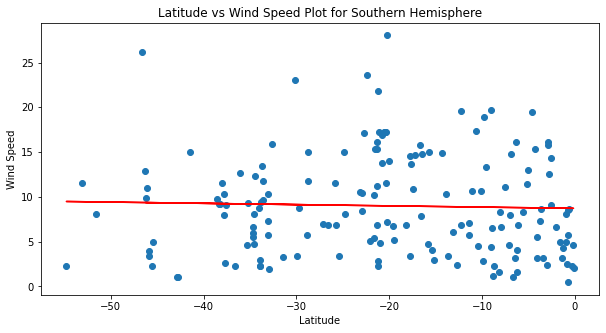

In [52]:
(slope, intercept, rvalue, pvalue, stderr) = linregress(southern['Lat'], southern['Wind Speed'])
regress_values = southern['Lat']*slope + intercept

plt.figure(figsize=(10,5));

plt.scatter(southern['Lat'], southern['Wind Speed'], )
plt.title("Latitude vs Wind Speed Plot for Southern Hemisphere"), 
plt.xlabel("Latitude"), 
plt.ylabel("Wind Speed");
plt.plot(southern['Lat'], regress_values, 'r-');
print(f"The r-squared is: {rvalue**2}")
plt.savefig('Images/SH_Windspeed_vs_Latitude_Linear_Regression.png', bbox_inches='tight')

This plot is analyzing the relationship between a city's windspeed and latitude where the city is within the Southern Hemisphere. Here, we do not see a relationtion between cloudiness and latitude. Our r value confirms this.